<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%22DownJoins%22%D0%A1%D0%B0%D1%84%D0%BE%D0%BD%D0%BE%D0%B2_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%22_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Загружаем библиотеки
# Задача на временные ряды
import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
from tensorflow.keras import utils #Для to_categorical
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианты моделей
from tensorflow.keras.layers import concatenate, Input, LeakyReLU, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов
from keras.regularizers import l1
# Рисовать графики сразу же
%matplotlib inline

In [ ]:
from google.colab import files #Загрузка файлов
#Загружаем файл базы
files.upload()
!ls

Saving DowJons++36.csv to DowJons++36.csv
DowJons++36.csv  sample_data


In [ ]:
base_data = pd.read_csv('DowJons++36.csv',  sep=';' , encoding='latin-1')
print(base_data.shape)

(429, 36)


In [ ]:
# Выводим параметры одного файла
d = base_data
print('Сколько есть записей = ',len(d),'\n') # Сколько есть записей
print('Длина одной строки данных =',len(d.iloc[0]), '\n') # Длина одной строки данных
print('Пример первой строки данных','\n',d.iloc[0],'\n') # Пример первой строки данных

Сколько есть записей =  429 

Длина одной строки данных = 36 

Пример первой строки данных 
 open            28639
max             29374
min             28170
close           28256
OPEN-MAX          735
OPEN-MIN          469
OPEN-CLOSE        383
MAX-MIN          1204
MAX-CLOSE        1118
MIN-CLOSE          87
OPEN-MAX.1      27435
OPEN-MIN.1      27521
OPEN-CLOSE.1    28552
MAX-MIN.1       28256
MAX-CLOSE.1     29287
MIN-CLOSE.1     28083
P1                266
P2                 86
P3                821
P4                 86
P5               1031
P6              27348
P7                 86
P8               1031
P9                296
P10              1031
R1                180
R2                735
R3                735
R4                945
R5              26317
R6              27262
R7                945
R8                735
R9                735
R10               851
Name: 0, dtype: int64 



In [ ]:
print('Отображаем исходные от точки start и длинной step,','\n')

Отображаем исходные от точки start и длинной step, 



No handles with labels found to put in legend.


Сколько точек (шагов - минут) отрисуем =  429


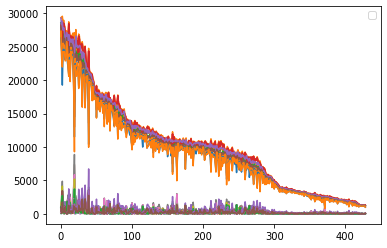

In [ ]:
start = 0

step = base_data.shape[0] #Сколько точек отрисуем
print('Сколько точек (шагов - минут) отрисуем = ',step)
"Plotim  4 канал"
plt.plot(base_data[start:start+step])
plt.legend()
plt.show()

In [ ]:
#Канал volume
print('Интревал рисуем , start + step', '\n' )
print('srart =', start, '\n')
print('step = ', step, '\n' )


Интревал рисуем , start + step 

srart = 0 

step =  429 



In [ ]:
print('Формируем параметры загрузки данных')

Формируем параметры загрузки данных


In [ ]:
xLen = 10          #Анализируем по 10 прошедшим точкам 
valLen = 300                  #Используем  записей для проверки

print('Делим данные на тренировочную и тестовую выборки')

trainLen = base_data.shape[0]-valLen
print('Размер тренировочной выборки =',trainLen )

xTrain,xTest = base_data[:trainLen], base_data[trainLen+xLen+2:]
print('Размер тестовой выборки =', trainLen+xLen+2 )

print('Для нормализации используем функцию MinMaxScaler()')
xScaler = MinMaxScaler()


print('Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке')

xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest  = xScaler.transform(xTest)

yTrain = np.array(base_data.iloc[:trainLen, 3]).reshape(-1, 1)
yTest  = np.array(base_data.iloc[trainLen+xLen+2:, 3]).reshape(-1, 1)

print('Делаем reshape,т.к. у нас только один столбец по одному значению')
print('Делаем reshape для тренировочной и тестовой выборки')
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

print('Создаем генератор для обучения на xTrain (тренировочной выборке)  TimeseriesGenerator')
batch_size_my = int(input('Размер batch для xTrain = '))
trainDataGen = TimeseriesGenerator(xTrain, yTrain,                #В качестве параметров наши выборки
                                    length=xLen, stride=1,        #Для каждой точки (из промежутка длины xLen)
                                    batch_size=batch_size_my)     #Размер batch, который будем скармливать модели

batch_size_my = int(input('Размер batch для xTest = '))
print('Создаем аналогичный генератор для тестовой XTest выборке при обучении')
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=batch_size_my)



Делим данные на тренировочную и тестовую выборки
Размер тренировочной выборки = 129
Размер тестовой выборки = 141
Для нормализации используем функцию MinMaxScaler()
Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
Делаем reshape,т.к. у нас только один столбец по одному значению
Делаем reshape для тренировочной и тестовой выборки
Создаем генератор для обучения на xTrain (тренировочной выборке)  TimeseriesGenerator
Размер batch для xTrain = 20
Размер batch для xTest = 20
Создаем аналогичный генератор для тестовой XTest выборке при обучении


In [ ]:
testDataGen.data.shape

(288, 36)

In [ ]:
trainDataGen.data.shape

(129, 36)

Создаем нейронную сеть на 150 нейронов  доп слой Dense, activation=linear
Компилируем, loss = mse, optimizer =1e-4
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           (None, 1, 1250)           451250    
_________________________________________________________________
dropout_34 (Dropout)         (None, 1, 1250)           0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 1250)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 30)                37530     
_________________________________________________________________
flatten_71 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 31        
Total

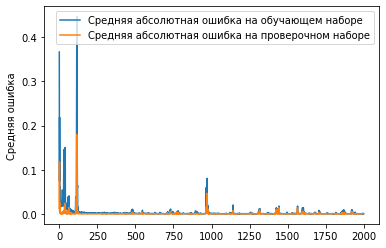

In [ ]:
print('Создаем нейронную сеть на 150 нейронов  доп слой Dense, activation=linear')
modelD = Sequential()

#modelD.add(LSTM(250, input_shape = (xLen,36), activation="linear"))
modelD.add(Conv1D(1250,10, input_shape = (xLen,36), activation="linear"))
modelD.add(Dropout(0.5))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
modelD.add(Flatten())

modelD.add(Dense(30, activation='linear')) 

modelD.add(Flatten())
modelD.add(Dense(1, activation = "linear"))

print('Компилируем, loss = mse, optimizer =1e-4')
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))
modelD.summary()

print('Запускаем обучение')
#epochs = int(input('Введите количество эпох:'))
history = modelD.fit_generator(
                    trainDataGen, 
                    epochs=2000
                    , 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

#Выводим графики Ждем.........................
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
print('Визуализация результатов')
print('Функция рассчитываем результаты прогнозирования сети')
print('Выдаёт результаты предсказания predVal')
print('И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)')
def getPred(currModel, xVal, yVal, yScaler):
 
 
  predVal = yScaler.inverse_transform(currModel.predict(xVal))  # Предсказываем ответ сети по проверочной выборке
  yValUnscaled = yScaler.inverse_transform(yVal)                # И возвращаем исходны масштаб данных, до нормализации
  
  return (predVal, yValUnscaled)

print('Функция визуализирует графики, что предсказала сеть и какие были правильные ответы')
print('start - точка с которой начинаем отрисовку графика')
print('step - длина графика, которую отрисовываем')
print('channel - какой канал отрисовываем')
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show() 


  # Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

  # Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

  #Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=10, stride=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

Визуализация результатов
Функция рассчитываем результаты прогнозирования сети
Выдаёт результаты предсказания predVal
И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
start - точка с которой начинаем отрисовку графика
step - длина графика, которую отрисовываем
channel - какой канал отрисовываем


# #Прогнозируем данные 


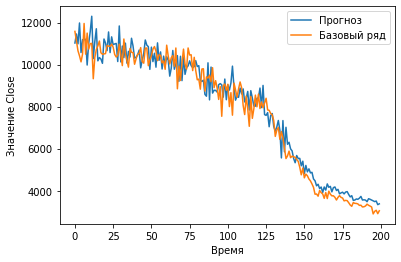

Реальный 11578     Прогноз  11024 Разница = 554
Реальный 11109     Прогноз  11452 Разница = -343
Реальный 10655     Прогноз  10985 Разница = -330
Реальный 10414     Прогноз  11978 Разница = -1564
Реальный 10128     Прогноз  10571 Разница = -443
Реальный 10502     Прогноз  11187 Разница = -685
Реальный 11955     Прогноз  11180 Разница = 775
Реальный 10495     Прогноз  11203 Разница = -708
Реальный 11497     Прогноз  9977 Разница = 1520
Реальный 10734     Прогноз  11004 Разница = -270
Реальный 10993     Прогноз  11562 Разница = -569
Реальный 11009     Прогноз  12298 Разница = -1289
Реальный 9325     Прогноз  10282 Разница = -957
Реальный 10337     Прогноз  11086 Разница = -749
Реальный 10718     Прогноз  11703 Разница = -985
Реальный 10887     Прогноз  10177 Разница = 710
Реальный 11118     Прогноз  10332 Разница = 786
Реальный 10560     Прогноз  10262 Разница = 298
Реальный 10490     Прогноз  10058 Разница = 432
Реальный 10504     Прогноз  11215 Разница = -711
Реальный 10522     Прогноз

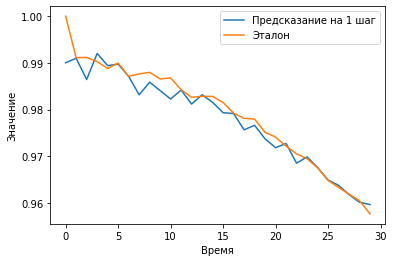

In [ ]:
#Прогнозируем данные текущей сетью Это то что сейчас. Стало хуже
currModel = modelD #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 200, 0, predVal, yValUnscaled)
for i in range(100):
  y1 = yScaler.inverse_transform(yVal[0][i].reshape(-1,1))
  y2 = yScaler.inverse_transform(modelD.predict(xVal[0][i].reshape(1,10,36)))
  print( 'Реальный', int(y1[0][0]),'    Прогноз ', int(y2[0][0]), 'Разница =', int(y1[0][0]) -int(y2[0][0]))


#Отображаем корреляцию хотим улучшить 0.999 пока 0.997. стало 0.9992 
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0],30    
         
         
         , predVal, yValUnscaled)

In [ ]:
#Формируем параметры загрузки данных
xLen = 20                       #Анализируем по 20 прошедшим точкам 
valLen = 100                    #Используем 100 записей для проверки
stepsForward = 10
trainLen = data.shape[0]-valLen #Размер тренировочной выборки

#Делим данные на тренировочную и тестовую выборки 
xTrain,xTest = data[:trainLen-stepsForward], data[trainLen+xLen+2:-stepsForward+1]

#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

#Для подготовки yTrain на 10 шагов вперед необходимо создать дополнительный датасет
yTrain = np.array([data[:trainLen,0][i:i+stepsForward] for i in range(trainLen-stepsForward)])
yTest = np.array([data[trainLen+xLen+2:,0][i:i+stepsForward] for i in range(valLen-xLen-stepsForward-1)])
yScaler = StandardScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, sampling_rate=1, #Для каждой точки
                               batch_size=20)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, sampling_rate=1,
                               batch_size=20)

# Нейронка 2

Epoch 1/1000
6/6 [==============================] - 1s 151ms/step - loss: 0.0682 - val_loss: 0.0040
Epoch 2/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0450 - val_loss: 0.0052
Epoch 3/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0290 - val_loss: 0.0101
Epoch 4/1000
6/6 [==============================] - 0s 19ms/step - loss: 0.0270 - val_loss: 0.0042
Epoch 5/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0237 - val_loss: 0.0026
Epoch 6/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0161 - val_loss: 0.0014
Epoch 7/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0155 - val_loss: 0.0014
Epoch 8/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0147 - val_loss: 0.0023
Epoch 9/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0167 - val_loss: 7.3302e-04
Epoch 10/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.0112 - val_loss: 8.5733e-04


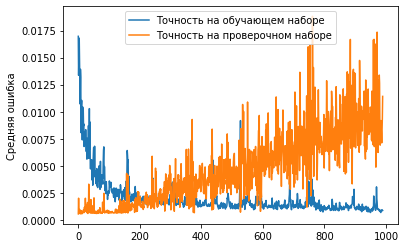

In [ ]:
dataInput = Input(shape=(xLen,36))

lstmWay = LSTM(200, return_sequences="True")(dataInput)
lstmWayDr = Dropout(0.7) (lstmWay)
convWay = Conv1D(200, 5, activation="tanh")(dataInput)
convWayDr = Dropout(0.7) (convWay)

lstmConvWay = Conv1D(200, 5, activation="tanh")(lstmWayDr)
lstmConvWayDr = Dropout(0.7) (lstmConvWay)
convLstmWay = LSTM(200, return_sequences="True")(convWayDr)

lstmWay = LSTM(200, return_sequences="True")(lstmWayDr)
lstmWayDr = Dropout(0.7) (lstmWay)

convWay = Conv1D(20, 5, activation="tanh")(convWayDr)
convWayDr = Dropout(0.7) (convWay)


lstmWay = Flatten()(lstmWay)
convWay = Flatten()(convWay)
lstmConvWay = Flatten()(lstmConvWay)
convLstmWay = Flatten()(convLstmWay)

finWay = concatenate([lstmWay, convWay, lstmConvWay, convLstmWay])
finWay = Dense(10, activation="linear")(finWay)
finWay = Dense(yTrain.shape[1], activation="linear")(finWay)

modelX3 = Model(dataInput, finWay)

modelX3.compile(loss="mse", optimizer=Adam(lr=1e-4))

history = modelX3.fit_generator(
                    trainDataGen, 
                    epochs=1000, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

plt.plot(history.history['loss'][10:], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Точность на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

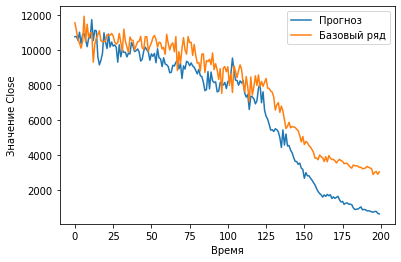

Реальный 11578     Прогноз  11024 Разница = 554
Реальный 11109     Прогноз  11452 Разница = -343
Реальный 10655     Прогноз  10985 Разница = -330
Реальный 10414     Прогноз  11978 Разница = -1564
Реальный 10128     Прогноз  10571 Разница = -443
Реальный 10502     Прогноз  11187 Разница = -685
Реальный 11955     Прогноз  11180 Разница = 775
Реальный 10495     Прогноз  11203 Разница = -708
Реальный 11497     Прогноз  9977 Разница = 1520
Реальный 10734     Прогноз  11004 Разница = -270
Реальный 10993     Прогноз  11562 Разница = -569
Реальный 11009     Прогноз  12298 Разница = -1289
Реальный 9325     Прогноз  10282 Разница = -957
Реальный 10337     Прогноз  11086 Разница = -749
Реальный 10718     Прогноз  11703 Разница = -985
Реальный 10887     Прогноз  10177 Разница = 710
Реальный 11118     Прогноз  10332 Разница = 786
Реальный 10560     Прогноз  10262 Разница = 298
Реальный 10490     Прогноз  10058 Разница = 432
Реальный 10504     Прогноз  11215 Разница = -711
Реальный 10522     Прогноз

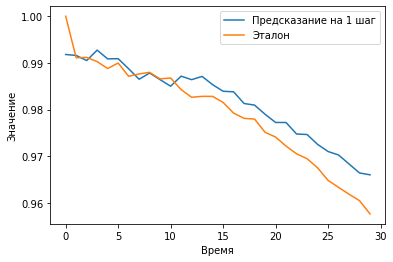

In [ ]:
#Прогнозируем данные текущей сетью Это то что сейчас. Стало хуже
currModel = modelX3 #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 200, 0, predVal, yValUnscaled)
for i in range(100):
  y1 = yScaler.inverse_transform(yVal[0][i].reshape(-1,1))
  y2 = yScaler.inverse_transform(modelD.predict(xVal[0][i].reshape(1,10,36)))
  print( 'Реальный', int(y1[0][0]),'    Прогноз ', int(y2[0][0]), 'Разница =', int(y1[0][0]) -int(y2[0][0]))


#Отображаем корреляцию хотим улучшить 0.999 пока 0.997. стало 0.9992 
#Используем выходной канал - только open
#Проверяем корреляцию на глубину 60 шагов
showCorr([0],30    
         
         
         , predVal, yValUnscaled)

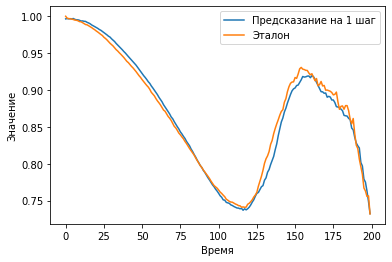

In [ ]:
#Отображаем корреляцию
showCorr([0], 200 , predVal, yValUnscaled)